<div style="background-color:#FFFFFF; padding:20px;">
  <h1 style="font-size:5em; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-weight:bold; color:#3E3E3E; text-align:center; text-shadow:2px 2px #F5F5F5; margin-bottom:0;">Marketing Campaign</h1>
  <p style="font-size:1.2em; font-family: 'Open Sans', Tahoma, Geneva, Verdana, sans-serif; font-weight:bold; color:#3E3E3E; text-align:center; margin-top:5px; margin-bottom:0;">Notebook Version: 3.0 | Author: Pranshu Chaurasia | Last Updated: April 29, 2023</p>
  <hr style="margin-top:5px; margin-bottom:5px;">
</div>

# Introduction
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It
helps a business to better understand its customers and makes it easier for them to
modify products according to the specific needs, behaviors and concerns of different
types of customers. </br>

# Problem Statement
Customer personality analysis helps a business to modify its product based on its target
customers from different types of customer segments. For example, instead of spending
money to market a new product to every customer in the company’s database, a
company can analyze which customer segment is most likely to buy the product and then
market the product only on that particular segment.

# Objective
The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign so that who will respond to an offer for a product or service.

# Importing the required Libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix, ConfusionMatrixDisplay


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

# Imporing the dataset

In [2]:
data=pd.read_csv(r'marketing_campaign.csv')

In [3]:
# Creating a copy of pandas dataframe
df = data.copy()

In [4]:
#Displaying 10 ramdom rows from the data
df.sample(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
928   10037        1993  Graduation         Single  74293.0        0   
1577   9298        1947         PhD       Together  81574.0        0   
725    7212        1966  Graduation        Married  44794.0        0   
1520   4278        1983         PhD         Single  87188.0        0   
707    6991        1951  Graduation       Divorced  43185.0        0   
281   10144        1976  Graduation       Together  51369.0        0   
160    2795        1958      Master         Single  30523.0        2   
1326   7937        1982  Graduation        Married  24711.0        0   
1649   7485        1950         PhD          Widow  56551.0        1   
1725   2634        1979      Master         Single  16653.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
928          0  2014-05-04       66       375  ...                  2   
1577         0  2014-04-28       89      1252  ...                  1   
725          1  2014-06-08       99        54  ...                  6   
1520         0  2013-06-03       73       910  ...                  3   
707          1  2013-04-10       88       537  ...                  8   
281          1  2012-10-25       84       297  ...                  8   
160          1  2013-07-01        0         5  ...                  7   
1326         0  2014-04-18       86        10  ...                  7   
1649         1  2014-05-07       48        67  ...                  4   
1725         0  2014-04-18       10         5  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
928              0             0             0             0             0   
1577             0             1             1             0             0   
725              0             0             0             0             0   
1520             0             0             0             0             0   
707              0             0             0             0             0   
281              0             0             0             0             0   
160              0             0             0             0             0   
1326             0             0             0             0             0   
1649             0             0             0             0             0   
1725             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
928          0              3         11         0  
1577         0              3         11         0  
725          0              3         11         0  
1520         0              3         11         1  
707          0              3         11         0  
281          0              3         11         0  
160          0              3         11         0  
1326         0              3         11         0  
1649         0              3         11         0  
1725         0              3         11         1  

[10 rows x 29 columns]

# Attribute Information:
<table>
<thead>
<tr>
<th>Column Name</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>AcceptedCmp1</strong></td>
<td>1 if customer accepted the offer in the 1st campaign, 0 otherwise</td>
</tr>
<tr>
<td><strong>AcceptedCmp2</strong></td>
<td>1 if customer accepted the offer in the 2nd campaign, 0 otherwise</td>
</tr>
<tr>
<td><strong>AcceptedCmp3</strong></td>
<td>1 if customer accepted the offer in the 3rd campaign, 0 otherwise</td>
</tr>
<tr>
<td><strong>AcceptedCmp4</strong></td>
<td>1 if customer accepted the offer in the 4th campaign, 0 otherwise</td>
</tr>
<tr>
<td><strong>AcceptedCmp5</strong></td>
<td>1 if customer accepted the offer in the 5th campaign, 0 otherwise</td>
</tr>
<tr>
<td><strong>Complain</strong></td>
<td>1 if customer complained in the last 2 years</td>
</tr>
<tr>
<td><strong>DtCustomer</strong></td>
<td>date of customer’s enrolment with the company</td>
</tr>
<tr>
<td><strong>Education</strong></td>
<td>customer’s level of education</td>
</tr>
<tr>
<td><strong>Marital_Status</strong></td>
<td>customer’s marital status</td>
</tr>
<tr>
<td><strong>Kidhome</strong></td>
<td>number of small children in customer’s household</td>
</tr>
<tr>
<td><strong>Teenhome</strong></td>
<td>number of teenagers in customer’s household</td>
</tr>
<tr>
<td><strong>Income</strong></td>
<td>customer’s yearly household income</td>
</tr>
<tr>
<td><strong>MntFishProducts</strong></td>
<td>amount spent on fish products in the last 2 years</td>
</tr>
<tr>
<td><strong>MntMeatProducts</strong></td>
<td>amount spent on meat products in the last 2 years</td>
</tr>
<tr>
<td><strong>MntFruits</strong></td>
<td>amount spent on fruits products in the last 2 years</td>
</tr>
<tr>
<td><strong>MntSweetProducts</strong></td>
<td>amount spent on sweet products in the last 2 years</td>
</tr>
<tr>
<td><strong>MntWines</strong></td>
<td>amount spent on wine products in the last 2 years</td>
</tr>
<tr>
<td><strong>MntGoldProds</strong></td>
<td>amount spent on gold products in the last 2 years</td>
</tr>
<tr>
<td><strong>NumDealsPurchases</strong></td>
<td>number of purchases made with discount</td>
</tr>
<tr>
<td><strong>NumCatalogPurchases</strong></td>
<td>number of purchases made using catalogue</td>
</tr>
<tr>
<td><strong>NumStorePurchases</strong></td>
<td>number of purchases made directly in stores</td>
</tr>
<tr>
<td><strong>NumWebPurchases</strong></td>
    <td>number of purchases made through company’s web site</td>
 <tr>
<tr>
<td><strong>Recency</strong></td>
<td>number of days since the last purchase</td>
</tr>

<tr>
<td><strong>NumWebVisitsMonth</strong></td>
<td>number of visits to company’s web site in the last month</td>
</tr>

<tr>
<td><strong>Year_Birth</strong></td>
<td>Birth Year of Customer</td>
</tr>

<tr>
<td><strong>ID</strong></td>
<td>Unique Id </td>
</tr>

<tr>
<td><strong>Z_CostContact</strong></td>
<td>Cost to contact a customer</td>
</tr>

<tr>
<td><strong>Z_Revenue</strong></td>
<td>Revenue after client accepting campaign</td>
</tr>

<td><strong>Response (Target Variable)</strong></td>
<td>1 if customer accepted the offer in the last campaign, 0 otherwise</td>
</tr>

# Exploratory Data Analysis

In [5]:
# Checking size of data
df.shape

(2240, 29)

We see that the total rows are 2240 and total columns are 29.

In [6]:
# General info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Null Value Removal

In [7]:
#Checking if NULL values are present in dataset
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**We see that 24 rows have NULL value in Income**

In [8]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
null_counts*100

Income                 1.071429
ID                     0.000000
NumDealsPurchases      0.000000
Z_Revenue              0.000000
Z_CostContact          0.000000
Complain               0.000000
AcceptedCmp2           0.000000
AcceptedCmp1           0.000000
AcceptedCmp5           0.000000
AcceptedCmp4           0.000000
AcceptedCmp3           0.000000
NumWebVisitsMonth      0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumWebPurchases        0.000000
MntGoldProds           0.000000
Year_Birth             0.000000
MntSweetProducts       0.000000
MntFishProducts        0.000000
MntMeatProducts        0.000000
MntFruits              0.000000
MntWines               0.000000
Recency                0.000000
Dt_Customer            0.000000
Teenhome               0.000000
Kidhome                0.000000
Marital_Status         0.000000
Education              0.000000
Response               0.000000
dtype: float64

We see that column **'Income'** constitutes about **'1.071429%'** of total values. **We will drop the rows having missing values and check the distribution, if the distribution changes, we will impute the missing values.**

In [9]:
#Creating a copy as it is a good practice
df_copy = df.copy()

In [10]:
drop_df = df_copy.dropna()
drop_df.shape

(2216, 29)

 We have dropped NULL values and we will plot pdf for both before and after dropping the missing values, to check if the distribution is changed.

In [11]:
# Remove columns name which are not objects and 'ID' and 'Year_Birth'
non_object_columns = df.select_dtypes(exclude=['object']).columns
column_names = list(non_object_columns)
column_names.remove('ID')
column_names.remove('Year_Birth')
print(column_names)

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


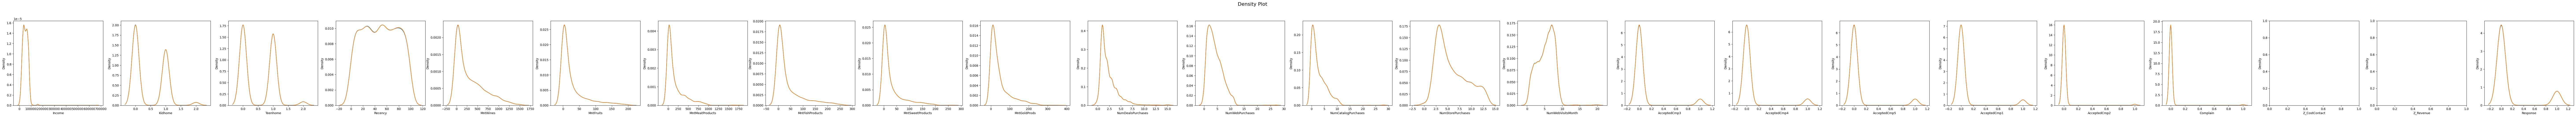

In [12]:
# Density plot using seaborn library
fig, axes = plt.subplots(nrows=1, ncols=len(column_names), figsize=(150, 5))

for i, col in enumerate(column_names): 
    # Plot density plot for 'Income' column in drop_df
    sns.kdeplot(drop_df[col], ax=axes[i], label='Dropped Rows')
    # Plot density plot for 'Income' column in df_copy
    sns.kdeplot(df_copy[col], ax=axes[i], label='Original Rows')

# Add title and labels
fig.suptitle('Density Plot', fontsize=16, y=1.05)
for i, ax in enumerate(axes):
    ax.set_xlabel(column_names[i])
    ax.set_ylabel('Density')
    
# Show the plot
plt.show()

We see that there is no impact in pdf for the features. Hence, we can go ahead with dropped dataframe.

In [13]:
df=drop_df.copy()

# Outliers Detection and Removal

In [14]:
# Collecting all the numerical dataset
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]

In [15]:
# Plot the box plot using plotly on the numerical dataset num_df
fig = px.box(num_df)
# Show the plot
fig.show()

We see that the outliers are present in Income, we will identify and remove the outliers.

In [16]:
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (q1 - 1.5 * iqr)) | (df['Income'] > (q3 + 1.5 * iqr))]

# Get the upper and lower threshold limit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Upper limit 118350.5
Lower limit -14525.5
Number of outliers in the Income column: 8


In [17]:
# Remove the outliers in the Income column
df = df[~((df['Income'] < (q1 - 1.5 * iqr)) | (df['Income'] > (q3 + 1.5 * iqr)))]

In [18]:
# The outliers for Income have been removed. 
df.shape

(2208, 29)

In [19]:
# Plotting the box plot to confirm the same for Income.
fig = px.box(df['Income'])
# Show the plot
fig.show()

# Feature Engineering

In [20]:
# Creating Age
df['Age']=2023-df['Year_Birth']

In [21]:
# Creating a dataframe total children
df['Total_Children']=df['Kidhome']+df['Teenhome']

In [22]:
# Grouping Similar Martial Status Together
df['Marital_Status']=df['Marital_Status'].replace({'Alone':'Single'})
df['Marital_Status']=df['Marital_Status'].replace({'Absurd':'YOLO'})

In [23]:
# Dropping column which are not required
to_drop = [ 'ID', 'Year_Birth','Z_CostContact', 'Z_Revenue','Dt_Customer', 'Kidhome', 'Teenhome']
df = df.drop(to_drop, axis=1)

In [24]:
# Grouping Similar Education Together
df['Education']=df['Education'].replace({'2n Cycle':'Master'})

In [25]:
# Encoding the Categorical columns - 'Education', 'Marital_Status'
# creating instance of labelencoder
education_label_encoder = LabelEncoder()
Marital_Status_label_encoder = LabelEncoder()

# Assigning numerical values for the column
df['Education'] = education_label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = Marital_Status_label_encoder.fit_transform(df['Marital_Status'])

In [26]:
#Seprating the target column and Other columns
X = df.drop('Response', axis=1)
y = df['Response']

In [27]:
# Splitting the dataset in test and train variable
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [28]:
# variance inflation factor to check multi collinerarity and remove the interdependent columns

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

vif_data["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
print(vif_data)  

                feature        VIF
0             Education   5.548107
1        Marital_Status   3.540512
2                Income  32.245202
3               Recency   3.700634
4              MntWines   6.136070
5             MntFruits   2.827140
6       MntMeatProducts   5.027435
7       MntFishProducts   3.200761
8      MntSweetProducts   2.838674
9          MntGoldProds   2.736876
10    NumDealsPurchases   4.480854
11      NumWebPurchases   6.879528
12  NumCatalogPurchases   6.189310
13    NumStorePurchases  10.476141
14    NumWebVisitsMonth   8.571132
15         AcceptedCmp3   1.215113
16         AcceptedCmp4   1.410167
17         AcceptedCmp5   1.721224
18         AcceptedCmp1   1.451056
19         AcceptedCmp2   1.142162
20             Complain   1.017967
21                  Age  18.790614
22       Total_Children   5.381250


In [29]:
# VIF is determined again to remove the interdependent columns
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

vif_data["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
print(vif_data)  

                feature        VIF
0             Education   5.548107
1        Marital_Status   3.540512
2                Income  32.245202
3               Recency   3.700634
4              MntWines   6.136070
5             MntFruits   2.827140
6       MntMeatProducts   5.027435
7       MntFishProducts   3.200761
8      MntSweetProducts   2.838674
9          MntGoldProds   2.736876
10    NumDealsPurchases   4.480854
11      NumWebPurchases   6.879528
12  NumCatalogPurchases   6.189310
13    NumStorePurchases  10.476141
14    NumWebVisitsMonth   8.571132
15         AcceptedCmp3   1.215113
16         AcceptedCmp4   1.410167
17         AcceptedCmp5   1.721224
18         AcceptedCmp1   1.451056
19         AcceptedCmp2   1.142162
20             Complain   1.017967
21                  Age  18.790614
22       Total_Children   5.381250


In [30]:
vif_to_drop=['Education','NumStorePurchases','Age','Income']

In [31]:
# Dropping the correlated variables from the train and test dataframe
X_train.drop(vif_to_drop,axis=1, inplace=True)
X_test.drop(vif_to_drop,axis=1, inplace=True)
X_train.shape, X_test.shape

((1656, 19), (552, 19))

In [32]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

vif_data["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
print(vif_data)  

                feature       VIF
0        Marital_Status  3.210992
1               Recency  3.428655
2              MntWines  5.367151
3             MntFruits  2.743419
4       MntMeatProducts  4.489465
5       MntFishProducts  3.152107
6      MntSweetProducts  2.776272
7          MntGoldProds  2.650398
8     NumDealsPurchases  4.154869
9       NumWebPurchases  6.220732
10  NumCatalogPurchases  5.670846
11    NumWebVisitsMonth  6.590032
12         AcceptedCmp3  1.189195
13         AcceptedCmp4  1.391305
14         AcceptedCmp5  1.673478
15         AcceptedCmp1  1.432573
16         AcceptedCmp2  1.140775
17             Complain  1.013501
18       Total_Children  4.052385


In [33]:
# We will use SMOTETomek to handle the imbalace data.
def resampling_min_class(X_train, y_train):
    # Resampling the minority class. The strategy can be changed as required.
    smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
    # Fit the model to generate the data.
    X_res, y_res = smt.fit_resample(X_train, y_train)
    
    return X_res,y_res

In [34]:
X_res, Y_res = resampling_min_class(X_train, y_train)

In [35]:
X_train1=X_res.copy()
y_train1=Y_res.copy()

In [36]:
# We will scale the data
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [37]:
X_train_scaled, X_test_scaled = scaler_standard(X_train1, X_test)

In [38]:
X_train2=X_train_scaled.copy()
X_test2=X_test_scaled.copy()

# Training the Model

In [39]:
# Create a function which can evaluate models and return a report
def evaluate_models(X_train, X_test, y_train, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics
    '''

    models_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)  # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1, model_train_precision, \
        model_train_recall, model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)

        # Test set performance
        model_test_accuracy, model_test_f1, model_test_precision, \
        model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print(f'- Accuracy: {model_train_accuracy:.4f}')
        print(f'- F1 score: {model_train_f1:.4f}')
        print(f'- Precision: {model_train_precision:.4f}')
        print(f'- Recall: {model_train_recall:.4f}')
        print(f'- Roc Auc Score: {model_train_rocauc_score:.4f}')

        print('Model performance for Test set')
        print(f'- Accuracy: {model_test_accuracy:.4f}')
        print(f'- F1 score: {model_test_f1:.4f}')
        print(f'- Precision: {model_test_precision:.4f}')
        print(f'- Recall: {model_test_recall:.4f}')
        print(f'- Roc Auc Score: {model_test_rocauc_score:.4f}')

        print('=' * 35)
        print('\n')

    report = pd.DataFrame(models_list, columns=['Model Name'])

    return report


In [40]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [41]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [42]:
report_knn = evaluate_models(X_train2, X_test2, y_train1, y_test, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9953
- F1 score: 0.9954
- Precision: 0.9929
- Recall: 0.9978
- Roc Auc Score: 0.9953
Model performance for Test set
- Accuracy: 0.8388
- F1 score: 0.5189
- Precision: 0.5053
- Recall: 0.5333
- Roc Auc Score: 0.7158


Decision Tree
Model performance for Training set
- Accuracy: 0.9953
- F1 score: 0.9953
- Precision: 1.0000
- Recall: 0.9907
- Roc Auc Score: 0.9953
Model performance for Test set
- Accuracy: 0.7899
- F1 score: 0.4423
- Precision: 0.3898
- Recall: 0.5111
- Roc Auc Score: 0.6776


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9079
- F1 score: 0.9110
- Precision: 0.8814
- Recall: 0.9427
- Roc Auc Score: 0.9079
Model performance for Test set
- Accuracy: 0.7880
- F1 score: 0.4800
- Precision: 0.4000
- Recall: 0.6000
- Roc Auc Score: 0.7123


Logistic Regression
Model performance for Training set
- Accuracy: 0.7717
- F1 score: 0.7759
- Precision: 0.7617
- Recall: 0.7907
- Roc Auc Score: 0.7717
Mo

We see that Catagorical boost, gives the highest recall score compared to Random Forest. So, even though we have a little bit lower accuracy than Random forest, we will go ahead with Catagorical Boost variable.

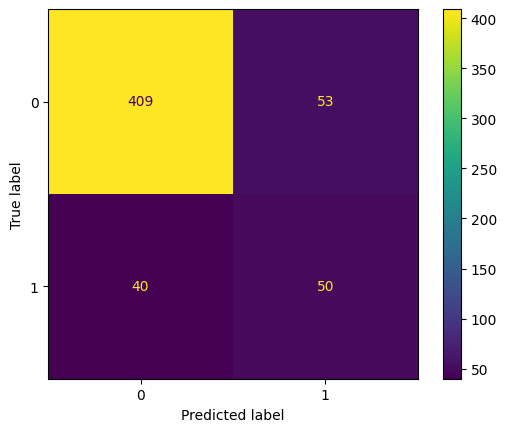

In [43]:
# Plots Confusion matrix for Catagorical Boost Classifier
final_model = CatBoostClassifier(verbose=False)
final_model.fit(X_train2, y_train1)
predictions = final_model.predict(X_test2)
cm = confusion_matrix(y_test, predictions, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
disp.plot()
plt.show()